In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-image/CatImage.jpg


# installation

In [2]:
!pip install imutils
!pip install opencv-python

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25861 sha256=b9433815bd1bc362badc99445db4d3d3feec1d49b7902561cc09347b45209f8e
  Stored in directory: /root/.cache/pip/wheels/35/e4/69/cb99d996d14a2971b79b990d68b05a17d58ce530ff96090dfc
Successfully built imutils


# import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils

import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline


# Load & Read Data

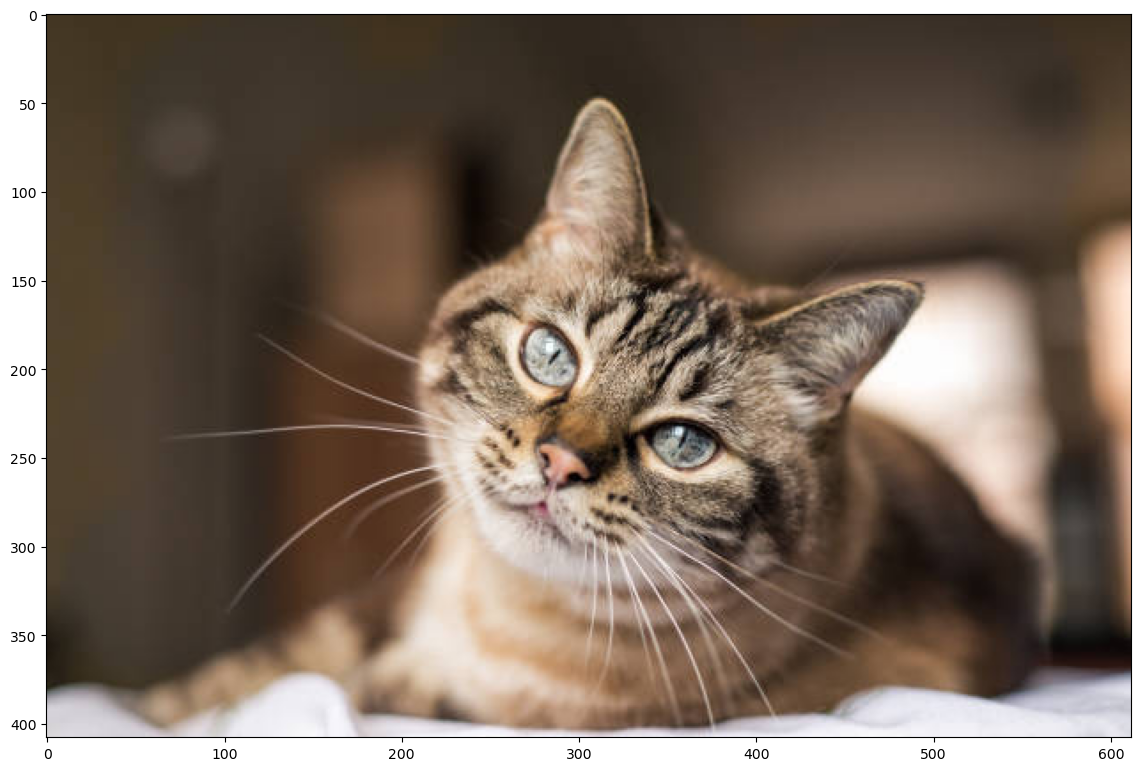

In [4]:
plt.figure(figsize = (14, 10)) 
imageData = plt.imread("../input/cat-image/CatImage.jpg") #input or read an image

plt.imshow(imageData) #show the image
plt.grid(False) ##it will give us the image in same as main image
#plt.grid(True) #it will give us the image in a grid format

plt.show() #to remove this text (<function matplotlib.pyplot.show(close=None, block=None)>
            #) we use show()

In [5]:
imageData.shape

(408, 612, 3)

# We will do above things in a function to make the code more readable & reusable

In [49]:
def catImageShow(imageTitle, image):
    if len(imageData.shape) == 3:
        imageVariable = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Here we will convert the image to RGB format by using cvtColor()    
    
    #elif len(imageData.shape) == 1:
       # imageVariable = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #if the image is in gray
        
    plt.figure(figsize=(4, 2))
    plt.imshow( imageVariable )
    plt.title(imageTitle)
    plt.show()

Splitting Image

In [7]:
cv2.split(imageData) #Here as we convert it into RGB so the matrices sequences are R, G, B
                     # Splitting channel

(array([[ 67,  67,  67, ...,  60,  60,  60],
        [ 67,  67,  67, ...,  60,  60,  60],
        [ 67,  67,  67, ...,  61,  61,  61],
        ...,
        [215, 216, 216, ..., 221, 220, 218],
        [216, 216, 217, ..., 224, 222, 220],
        [216, 217, 217, ..., 226, 224, 222]], dtype=uint8),
 array([[ 54,  54,  54, ...,  47,  47,  47],
        [ 54,  54,  54, ...,  47,  47,  47],
        [ 54,  54,  54, ...,  48,  48,  48],
        ...,
        [213, 214, 214, ..., 221, 220, 218],
        [214, 214, 215, ..., 224, 222, 220],
        [214, 215, 215, ..., 226, 224, 222]], dtype=uint8),
 array([[ 35,  35,  35, ...,  31,  31,  31],
        [ 35,  35,  35, ...,  31,  31,  31],
        [ 35,  35,  35, ...,  32,  32,  32],
        ...,
        [216, 217, 217, ..., 229, 228, 226],
        [217, 217, 218, ..., 232, 230, 228],
        [217, 218, 218, ..., 234, 232, 230]], dtype=uint8))

In [8]:
cv2.split(imageData.shape[0]) #Splitting Height

(array([[408.],
        [  0.],
        [  0.],
        [  0.]]),)

In [9]:
cv2.split(imageData.shape[1]) #Splitting Width

(array([[612.],
        [  0.],
        [  0.],
        [  0.]]),)

# Image Histogram

In [10]:
def imageHistogram(image, imageTitle, mask = None):
    colorChannel = cv2.split(image)
    colorCombination = ('b','g','r') #we take this sequnces in randomely or order of representation
                                    # we make it as a tuple because it is immutable or we won't change it in whole notebook
    plt.figure(figsize = (4,2))
    plt.title(imageTitle)
    plt.xlabel("Bins")
    plt.ylabel("Pixel Information")
    
    for(colorChannel, colorCombination) in zip(colorChannel, colorCombination):
        histogram = cv2.calcHist([colorChannel], [0], mask, [256], [0, 256]) # [0] means each pixel's zero index value, [256] is highest value of pixels, [0,256] is range of x-axis
       
        plt.plot(histogram, color = colorCombination)
        plt.xlim([0, 256]) #as matplotlib has two limitation(xlim,ylim), we declare x limitation 
        plt.show()

We will use our histogram in our raw image

We use this to determine frequency of color

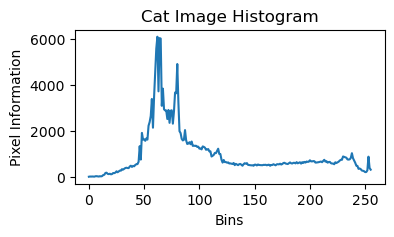

In [14]:
imageArgument = {"Image":"../input/cat-image/CatImage.jpg"}
image = cv2.imread(imageArgument["Image"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
sampleHistogram = cv2.calcHist([image], [0], None, [256], [0, 256]) #here [0] we can use only [0],[1],[2] values

plt.figure(figsize = (4, 2))
plt.title("Cat Image Histogram")
plt.xlabel("Bins")
plt.ylabel("Pixel Information")
plt.plot(sampleHistogram) #read histogram 
plt.show()

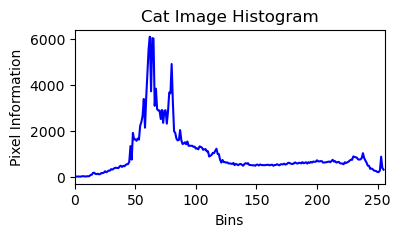

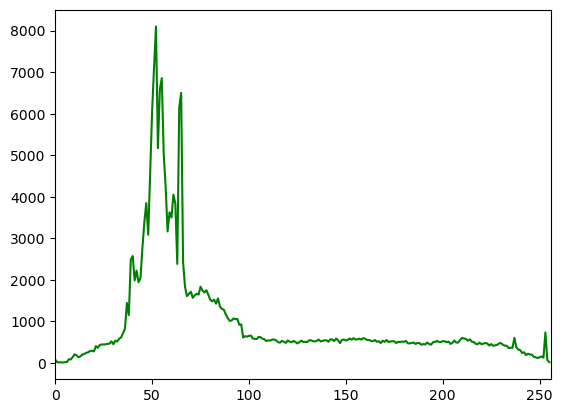

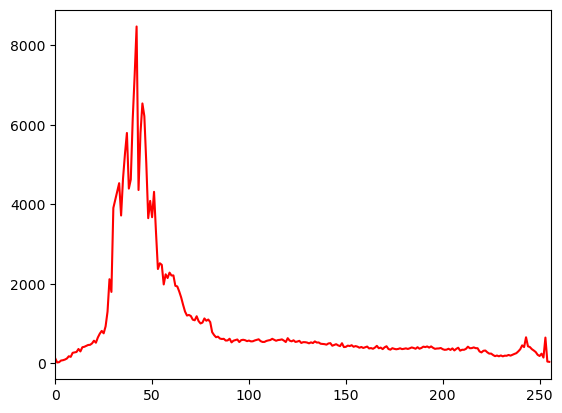

In [17]:
colorChannel = cv2.split(image)
colorCombination = ('b', 'g', 'r')
plt.figure(figsize = (4, 2))
plt.title("Cat Image Histogram")
plt.xlabel("Bins")
plt.ylabel("Pixel Information")

for (colorChannel, colorCombination) in zip(colorChannel, colorCombination):
    histogram = cv2.calcHist([colorChannel], [0], None, [256], [0, 256])
    plt.plot(histogram, color = colorCombination)
    plt.xlim([0, 256])
    plt.show()

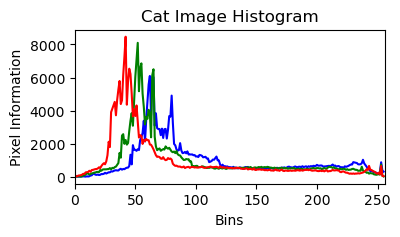

In [18]:
colorChannel = cv2.split(image)
colorCombination = ('b', 'g', 'r')
plt.figure(figsize = (4, 2))
plt.title("Cat Image Histogram")
plt.xlabel("Bins")
plt.ylabel("Pixel Information")

for (colorChannel, colorCombination) in zip(colorChannel, colorCombination):
    histogram = cv2.calcHist([colorChannel], [0], None, [256], [0, 256])
    plt.plot(histogram, color = colorCombination)
    plt.xlim([0, 256])
    #plt.show()

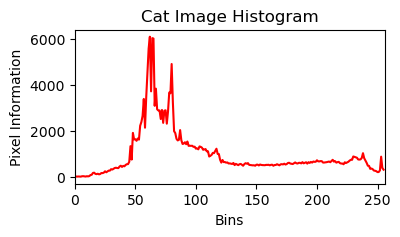

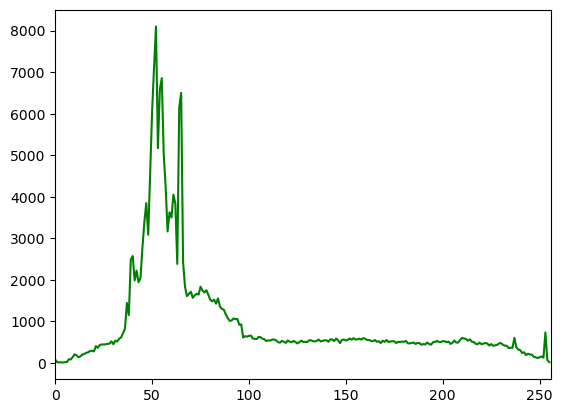

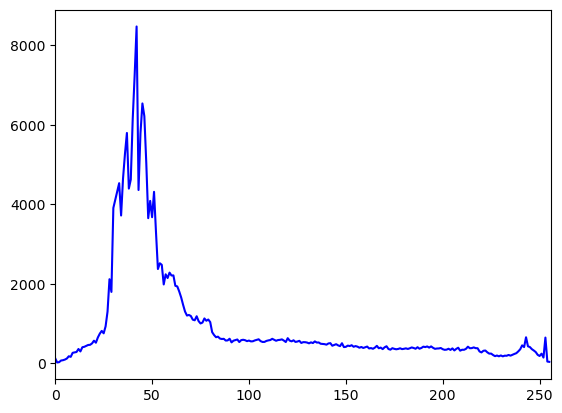

In [19]:
colorChannel = cv2.split(image)
colorCombination = ('r', 'g', 'b')
plt.figure(figsize = (4, 2))
plt.title("Cat Image Histogram")
plt.xlabel("Bins")
plt.ylabel("Pixel Information")

for (colorChannel, colorCombination) in zip(colorChannel, colorCombination):
    histogram = cv2.calcHist([colorChannel], [0], None, [256], [0, 256])
    plt.plot(histogram, color = colorCombination)
    plt.xlim([0, 256])
    plt.show()

We wil make axes of canvas

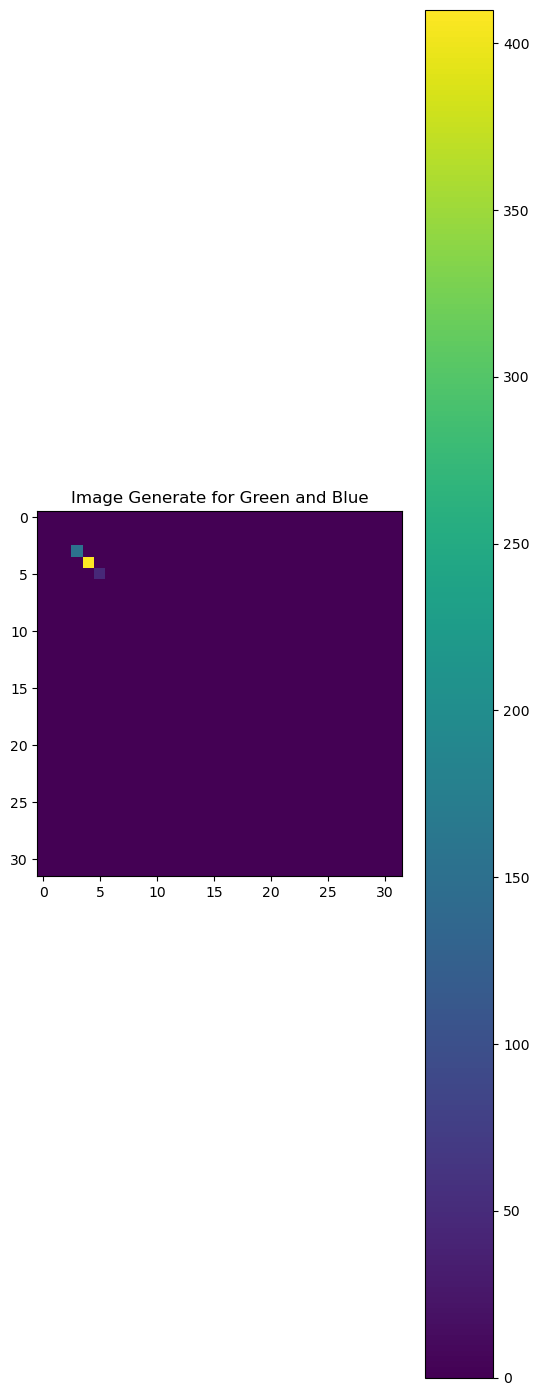

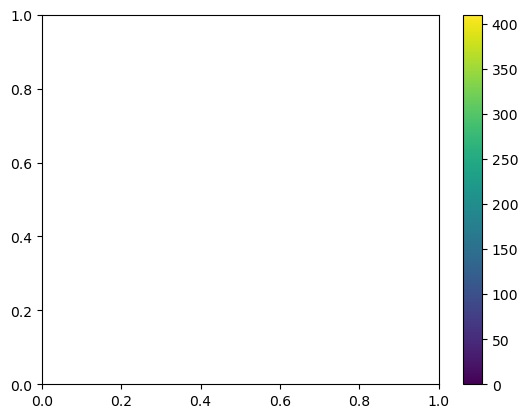

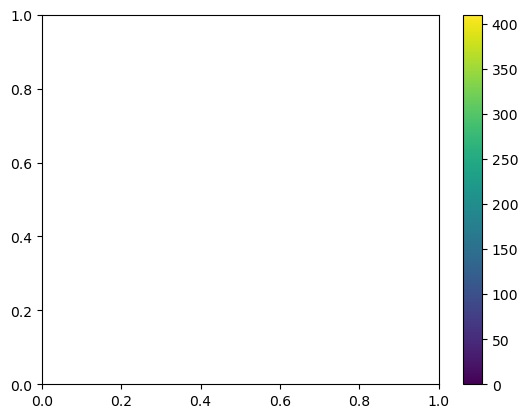

Image Shape: (32, 32) with 1024


In [31]:
color = ["B", "G", "R"]
figure = plt.figure(figsize = (20,18))

axes = figure.add_subplot(131)
histogram = cv2.calcHist([colorChannel[1], colorChannel[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
plot = axes.imshow(histogram, interpolation = "nearest")#interpolation means correlation of objects
axes.set_title("Image Generate for Green and Blue")
plt.colorbar(plot)
plt.show()

axes = figure.add_subplot(132)
histogram = cv2.calcHist([colorChannel[1], colorChannel[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
plot = axes.imshow(histogram, interpolation = "nearest")#interpolation means correlation of objects
axes.set_title("Image Generate for Green and Red")
plt.colorbar(plot)
plt.show()

axes = figure.add_subplot(133)
histogram = cv2.calcHist([colorChannel[0], colorChannel[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
plot = axes.imshow(histogram, interpolation = "nearest")#interpolation means correlation of objects
axes.set_title("Image Generate for Blue and Red")
plt.colorbar(plot)
plt.show()

print("Image Shape: {} with {}".format(histogram.shape, histogram.flatten().shape[0]))

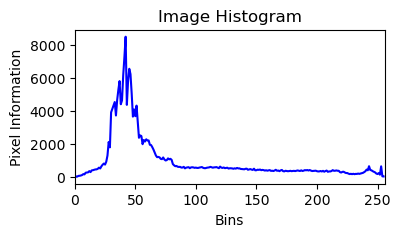

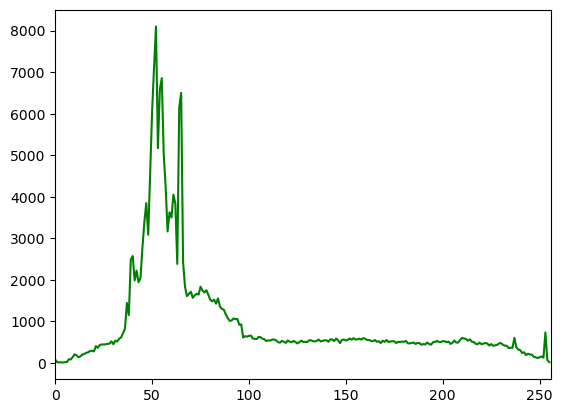

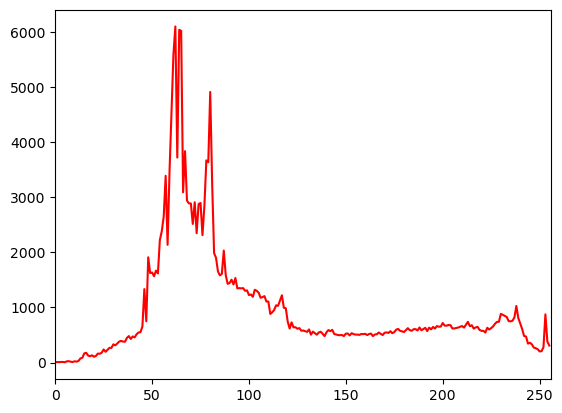

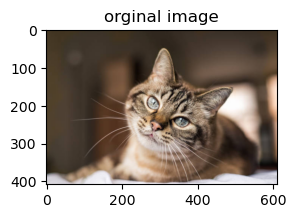

In [50]:
image = cv2.imread("../input/cat-image/CatImage.jpg")
imageHistogram(image, "Image Histogram")
catImageShow("orginal image", image)

In [64]:
def catImageShow(imageTitle, imageData):
    imageVarible = cv2.cvtColor(imageData, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4, 2))
    plt.imshow(imageVariable)
    plt.title(imageTitle)
    plt.show()

In [65]:
imageMask = np.zeros(imageData.shape[:2], dtype= "uint8")
cv2.rectangle(imageMask, (60, 90), (100, 120), 255, -1)
catImageShow("Applied Mask", imageMask)

NameError: name 'imageVariable' is not defined

<Figure size 400x200 with 0 Axes>